In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
from asgn1.cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import DataUtils as du
X_train, y_train, P_train, X_val, y_val, P_val, X_test, y_test, P_test = du.loadData()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (18927, 32, 32, 3)
Train labels shape:  (18927,)
Validation data shape:  (5375, 32, 32, 3)
Validation labels shape:  (5375,)
Test data shape:  (2682, 32, 32, 3)
Test labels shape:  (2682,)


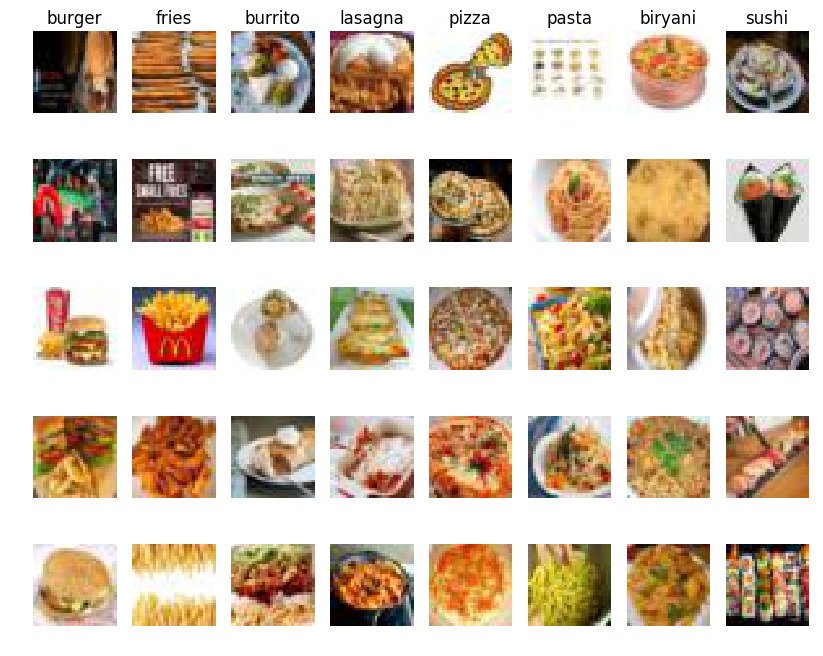

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['burger', 'fries', 'burrito', 'lasagna', 'pizza', 'pasta', 'biryani', 'sushi']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

#plt.savefig('assets/data_vis_2.png')
plt.show()

In [4]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (18927, 3072)
Validation data shape:  (5375, 3072)
Test data shape:  (2682, 3072)


In [7]:
from asgn1.cs231n.classifiers import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [9]:
# Open cs231n/classifiers/k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# Test your implementation:
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(2682, 18927)


In [12]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(y_test), accuracy))

Got 575 / 2682 correct => accuracy: 0.214392


In [13]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(y_test), accuracy))

Got 402 / 2682 correct => accuracy: 0.149888


In [15]:
num_folds = 3
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
#pass
X_train_folds.extend(np.split(X_train, num_folds))
y_train_folds.extend(np.split(y_train, num_folds))

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {}


################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
#pass

for k_cv in k_choices:
    k_to_accuracies[k_cv] = []
    
    for idx_fold in range(num_folds):
        X_cv_instance = X_train_folds[idx_fold]
        y_cv_instance = y_train_folds[idx_fold]
        
        X_train_instance_list = X_train_folds[:idx_fold] + X_train_folds[idx_fold+1:]
        y_train_instance_list = y_train_folds[:idx_fold] + y_train_folds[idx_fold+1:]
        X_train_instance = np.concatenate(X_train_instance_list)
        y_train_instance = np.concatenate(y_train_instance_list)
        
#        train
        classifier.train(X_train_instance, y_train_instance)
        
#        cross-validation
#        dists_cv = classifier.compute_distances_no_loops(X_cv_instance)        
#        y_cv_pred = classifier.predict_labels(dists_cv, k=k_cv)
      
        y_cv_pred = classifier.predict(X_cv_instance, k=k_cv)

        num_correct = np.sum(y_cv_pred == y_cv_instance)
        accuracy = float(num_correct) / len(y_cv_instance)        
        k_to_accuracies[k_cv].append(accuracy)
        
        
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.000793
k = 1, accuracy = 0.006023
k = 1, accuracy = 0.005548
k = 3, accuracy = 0.000793
k = 3, accuracy = 0.004438
k = 3, accuracy = 0.003487
k = 5, accuracy = 0.000317
k = 5, accuracy = 0.003646
k = 5, accuracy = 0.003170
k = 8, accuracy = 0.000317
k = 8, accuracy = 0.003329
k = 8, accuracy = 0.002378
k = 10, accuracy = 0.000317
k = 10, accuracy = 0.003646
k = 10, accuracy = 0.001744
k = 12, accuracy = 0.000000
k = 12, accuracy = 0.003804
k = 12, accuracy = 0.001585
k = 15, accuracy = 0.000000
k = 15, accuracy = 0.004597
k = 15, accuracy = 0.000793
k = 20, accuracy = 0.000000
k = 20, accuracy = 0.004755
k = 20, accuracy = 0.000476
k = 50, accuracy = 0.000000
k = 50, accuracy = 0.004755
k = 50, accuracy = 0.000000
k = 100, accuracy = 0.000000
k = 100, accuracy = 0.004121
k = 100, accuracy = 0.000000
